# EXPERIMENTO 1

## Datos

In [7]:
import pandas as pd
import numpy as np

x_train = pd.read_csv('data/1_train_x.csv', header=None)
y_train = pd.read_csv('data/1_train_y.csv', header=None)
x_test = pd.read_csv('data/1_test_x.csv', header=None)
y_test = pd.read_csv('data/1_test_y.csv', header=None)

# Agregar columna de unos
x_train = np.insert(x_train.values, 0, 1, axis=1) 
x_test = np.insert(x_test.values, 0, 1, axis=1)



## Funciones

In [8]:
def Calcular_Costo(X, Y, theta):
    cost = np.sum((np.dot(X,theta.T)-Y)**2) / (2*len(X))
    return cost

def Gradiente_descendiente(X, Y, theta, it, lr):
    costs = [0]*it
    size = len(X)
    for i in range(it):
        h = np.dot(X,theta.T)
        rest = h - Y
        deriv = np.dot(X.T,rest) / size
        theta = theta - (lr * deriv).T
        costs[i] = Calcular_Costo(X, Y , theta)
    return theta, costs

def Ecuacion_Normal(X, Y):
    theta = np.linalg.inv(np.dot(X.T, X))
    theta = np.dot(theta, X.T)
    theta = np.dot(theta, Y)
    return theta.T

def MSE(Yp,Y):
    tam =len(Y)
    error = np.sum((Yp - Y)**2) / tam
    return error

## Procedimiento

In [9]:
# Usando Ecuación Normal

thetas = np.zeros(5)[np.newaxis]

thetas_inicio = Ecuacion_Normal(x_train, y_train)
error_train = MSE(np.dot(x_train, thetas_inicio.T), y_train)
error_test = MSE(np.dot(x_test, thetas_inicio.T), y_test)

print('Thetas Ecuación Normal')
print(thetas_inicio)
# print(error_train)
# print(error_test)

# Gradiente Descendiente

learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iterations = [500, 1000, 1500, 2000, 2500, 3000, 3500]
matriz = np.zeros((len(learning_rate), len(iterations)))

x = 0
y = 0
for l in learning_rate:
    y = 0
    for i in iterations:
        theta_actual, vac = Gradiente_descendiente(x_train, y_train, thetas, i, l)
        matriz[x,y] = MSE(x_test.dot(theta_actual.T), y_test)
        y += 1
    x +=1


df_petroleo = pd.DataFrame(data=matriz, index = learning_rate, columns=iterations)

id_1, id_2 = np.where(matriz == matriz.min())  # hallar indices de elemento minimo
print ('Minimo: ', matriz.min())
print ('Learning rate: ', learning_rate[int(id_1)])
print ('Iterations: ', iterations[int(id_2)])
print (df_petroleo) 



Thetas Ecuación Normal
[[-0.08752625 -0.09203601 -0.36687041  0.1072892   0.64775736]]
Minimo:  0.6846207324016144
Learning rate:  0.01
Iterations:  500
          500       1000      1500      2000      2500      3000      3500
0.01  0.684621  0.703287  0.709549  0.711014  0.711345  0.711419  0.711435
0.05  0.711349  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440
0.10  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440
0.20  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440
0.30  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440
0.40  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440  0.711440


## Graficar

Text(0, 0.5, 'Costos')

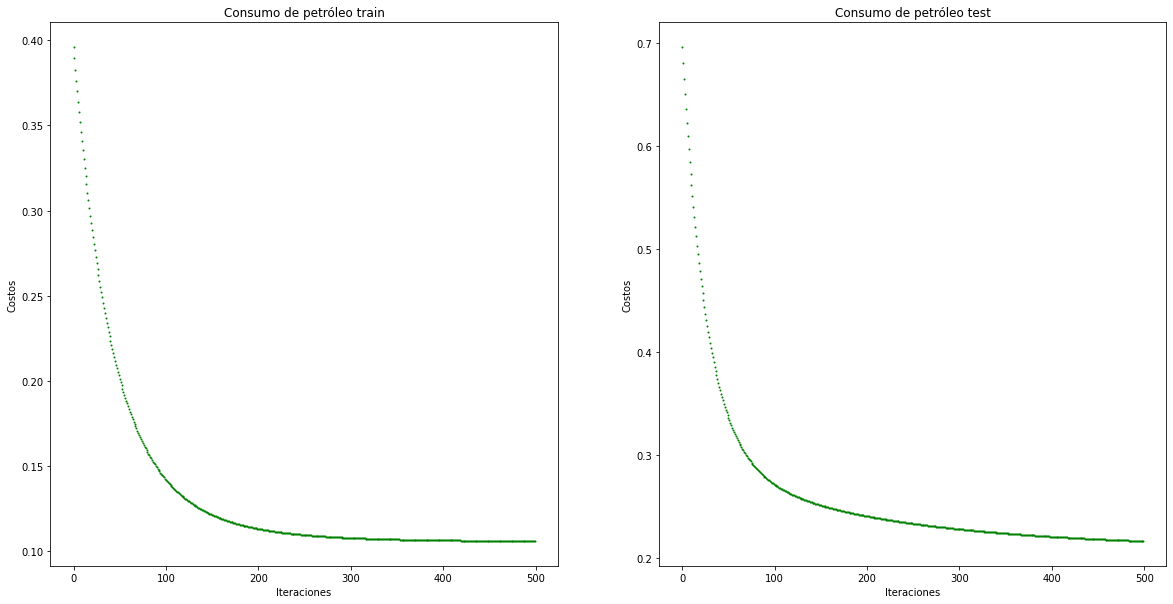

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20,10))

thetas_train, costos_train = Gradiente_descendiente(x_train, y_train, thetas, iterations[0], learning_rate[0])
thetas_train, costos_test = Gradiente_descendiente(x_test, y_test, thetas, iterations[0], learning_rate[0])

ax[0].scatter(np.arange(iterations[0]), costos_train, alpha = 1, c="green", s=1)
ax[0].set_title("Consumo de petróleo train")
ax[0].set_xlabel('Iteraciones')
ax[0].set_ylabel('Costos')

ax[1].scatter(np.arange(iterations[0]), costos_test, alpha = 1, c="green", s=1)
ax[1].set_title("Consumo de petróleo test")
ax[1].set_xlabel('Iteraciones')
ax[1].set_ylabel('Costos')

In [9]:
print('hola')

hola
